## Trending analysis of music preferences

#### Import library and package

In [5]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from matplotlib.figure import Figure 
from wordcloud import WordCloud

#### Load data

In [6]:
df_normal  = pd.read_csv('list_info.csv') # Load c√°c th√¥ng tin c√°c video v·ªÅ √¢m nh·∫°c th∆∞·ªùng
df_normal.head()


id             publishAt  \
0  _7UyRLB1HVg  2022-06-27T09:33:26Z   
1  CRW2YqJs-J4  2022-06-29T01:00:01Z   
2  zNOA_dLU3NM  2022-06-29T09:49:28Z   
3  8-933tJOtSY  2022-06-28T22:59:50Z   
4  yJFTFdgH5Bc  2022-05-22T03:00:18Z   

                                               title  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1  NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...   
2  Nh·∫°c Tr·∫ª Ballad Vi·ªát Hay Nh·∫•t 2022 | Lk Nh·∫°c T...   
3  EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...   
4  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...   

                                         description        channelTitle  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1  NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...         Orinn Remix   
2  Nh·∫°c Tr·∫ª Ballad Vi·ªát Hay Nh·∫•t 2022 | Lk Nh·∫°c T...          ACV Ballad   
3  EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...            Min Xinh   
4  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...  TPT Music For Life   

                                                tags  categoryId  \
0  ['acv trending', 'acv', 'nhac tre moi nhat', '...          10   
1  ['orinn remix', 'nh·∫°c tr·∫ª', 'nhac tre', 'nh·∫°c ...          10   
2  ['acv', 'acv ballad', 'nh·∫°c tr·∫ª', 'nhac tre', ...          22   
3  ['nh·∫°c tr·∫ª remix', 'nh·∫°c remix', 'nhac tre rem...          10   
4  ['tuy·ªÉn t·∫≠p nh·∫°c tr·∫ª', 'nh·∫°c tr·∫ª hay nh·∫•t', 'n...          10   

  defaultAudioLanguage    duration dimension  ... caption  privacyStatus  \
0                   vi  PT1H38M44S        2d  ...   False         public   
1                   vi  PT1H13M25S        2d  ...   False         public   
2                  NaN  PT1H36M33S        2d  ...   False         public   
3                  NaN  PT1H20M44S        2d  ...   False         public   
4                   vi  PT2H57M15S        2d  ...    True         public   

  embeddable  madeForKids  viewCount  likeCount  dislikeCount  favoriteCount  \
0       True        False     120741        NaN           NaN              0   
1       True        False      88228        NaN           NaN              0   
2       True        False       3442       30.0           NaN              0   
3       True        False      94147        NaN           NaN              0   
4       True        False     187001      747.0           NaN              0   

   commentCount                                    topicCategories  
0          26.0  ['https://en.wikipedia.org/wiki/Music', 'https...  
1          40.0  ['https://en.wikipedia.org/wiki/Electronic_mus...  
2           0.0            ['https://en.wikipedia.org/wiki/Music']  
3          26.0  ['https://en.wikipedia.org/wiki/Electronic_mus...  
4          18.0  ['https://en.wikipedia.org/wiki/Music', 'https...  

[5 rows x 21 columns]

In [7]:
# Xem th√¥ng tin t·ªïng quan v·ªÅ data frame
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3073 non-null   object 
 1   publishAt             3073 non-null   object 
 2   title                 3073 non-null   object 
 3   description           3023 non-null   object 
 4   channelTitle          3073 non-null   object 
 5   tags                  2633 non-null   object 
 6   categoryId            3073 non-null   int64  
 7   defaultAudioLanguage  1565 non-null   object 
 8   duration              3073 non-null   object 
 9   dimension             3073 non-null   object 
 10  definition            3073 non-null   object 
 11  caption               3073 non-null   bool   
 12  privacyStatus         3073 non-null   object 
 13  embeddable            3073 non-null   bool   
 14  madeForKids           3073 non-null   bool   
 15  viewCount            

In [8]:
# Filter out music videos ie categoryId is 10 ‚Äì Music
df_normal = df_normal[df_normal['categoryId']==10]

In [9]:
# Handling null values ‚Äã‚Äãin data frames
df_normal_preprocessed = df_normal.fillna({'description':'', 'tags':'', 'defaultAudioLanguage':'', 'likeCount':0, 'dislikeCount':0, 'commentCount':0, 'topicCategories':'' })
df_normal_preprocessed.head()

id             publishAt  \
0  _7UyRLB1HVg  2022-06-27T09:33:26Z   
1  CRW2YqJs-J4  2022-06-29T01:00:01Z   
3  8-933tJOtSY  2022-06-28T22:59:50Z   
4  yJFTFdgH5Bc  2022-05-22T03:00:18Z   
5  5BQKXF56e8A  2022-04-11T12:00:03Z   

                                               title  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1  NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...   
3  EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...   
4  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...   
5  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...   

                                         description        channelTitle  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1  NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...         Orinn Remix   
3  EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...            Min Xinh   
4  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...  TPT Music For Life   
5  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...       Sai Gon Music   

                                                tags  categoryId  \
0  ['acv trending', 'acv', 'nhac tre moi nhat', '...          10   
1  ['orinn remix', 'nh·∫°c tr·∫ª', 'nhac tre', 'nh·∫°c ...          10   
3  ['nh·∫°c tr·∫ª remix', 'nh·∫°c remix', 'nhac tre rem...          10   
4  ['tuy·ªÉn t·∫≠p nh·∫°c tr·∫ª', 'nh·∫°c tr·∫ª hay nh·∫•t', 'n...          10   
5  ['Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi', 'Li√™n Kh√∫c Nh...          10   

  defaultAudioLanguage    duration dimension  ... caption  privacyStatus  \
0                   vi  PT1H38M44S        2d  ...   False         public   
1                   vi  PT1H13M25S        2d  ...   False         public   
3                       PT1H20M44S        2d  ...   False         public   
4                   vi  PT2H57M15S        2d  ...    True         public   
5                       PT2H15M17S        2d  ...   False         public   

  embeddable  madeForKids  viewCount  likeCount  dislikeCount  favoriteCount  \
0       True        False     120741        0.0           0.0              0   
1       True        False      88228        0.0           0.0              0   
3       True        False      94147        0.0           0.0              0   
4       True        False     187001      747.0           0.0              0   
5       True        False    1226523     4479.0           0.0              0   

   commentCount                                    topicCategories  
0          26.0  ['https://en.wikipedia.org/wiki/Music', 'https...  
1          40.0  ['https://en.wikipedia.org/wiki/Electronic_mus...  
3          26.0  ['https://en.wikipedia.org/wiki/Electronic_mus...  
4          18.0  ['https://en.wikipedia.org/wiki/Music', 'https...  
5          82.0  ['https://en.wikipedia.org/wiki/Electronic_mus...  

[5 rows x 21 columns]

In [10]:
# M√¥ t·∫£ c√°c thu·ªôc t√≠nh c√≥ gi√° tr·ªã nguy√™n
df_normal.describe()

categoryId     viewCount     likeCount  dislikeCount  favoriteCount  \
count      2017.0  2.017000e+03  1.550000e+03           0.0         2017.0   
mean         10.0  3.873928e+06  8.081111e+04           NaN            0.0   
std           0.0  2.202867e+07  3.748313e+05           NaN            0.0   
min          10.0  0.000000e+00  0.000000e+00           NaN            0.0   
25%          10.0  2.093800e+04  4.730000e+02           NaN            0.0   
50%          10.0  1.503780e+05  3.029000e+03           NaN            0.0   
75%          10.0  6.434780e+05  1.599100e+04           NaN            0.0   
max          10.0  5.539953e+08  6.292895e+06           NaN            0.0   

        commentCount  
count    2011.000000  
mean     2402.290403  
std     14463.857604  
min         0.000000  
25%         9.000000  
50%        45.000000  
75%       190.000000  
max    302920.000000

In [11]:
# Draw a statistical pie chart according to the number of views of the videos
def pieCharViewCounts(df):
    listVideo_10KView = df[df['viewCount']<100000]['id']
    listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
    listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
    listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
    listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']

    y = np.array([len(listVideo_10KView),
                    len(listVideo_100KView),
                    len(listVideo_1MView),
                    len(listVideo_10MView),
                    len(listVideo_100MView),
                ])
    mylabel = ['Video 10 thousand views', 'Video 100 thousand views', 'Video million views', 'Video 10 million views', 'Video 100 million views']
   
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.pie(y, labels=mylabel)
    plt.show()

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


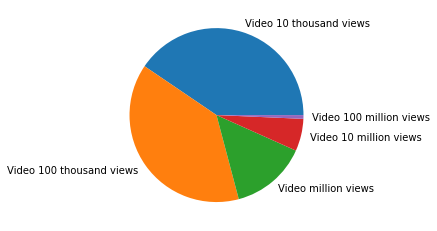

In [12]:
pieCharViewCounts(df_normal)

#### X·ª≠ l√Ω tag v√† t√™n channel (th√™m "_" v√†o c√°c tag)


In [13]:
df_normal_preprocessed['tags'].fillna('', inplace=True)

In [14]:
def removeSpace(listItems, noise):
    tagsPreprocessed = []
    for item in listItems:
        if item == noise:
            tagsPreprocessed.append(item)
            continue
        item = item.replace(' ','_')
        item = item.replace(',_',', ')
        tagsPreprocessed.append(item)
    # print(tagsPreprocessed)
    return tagsPreprocessed

In [15]:
print(df_normal_preprocessed['tags'])
tagsPreprocessed = removeSpace(df_normal_preprocessed['tags'], ' ')
# df_normal_preprocessed.drop(columns=['tags'])
# df_normal_preprocessed.assign(tags = tagsPreprocessed)
# print(df_normal_preprocessed['tags'])
# print(tagsPreprocessed)
df_normal_preprocessed['tags'] = tagsPreprocessed

0       ['acv trending', 'acv', 'nhac tre moi nhat', '...
1       ['orinn remix', 'nh·∫°c tr·∫ª', 'nhac tre', 'nh·∫°c ...
3       ['nh·∫°c tr·∫ª remix', 'nh·∫°c remix', 'nhac tre rem...
4       ['tuy·ªÉn t·∫≠p nh·∫°c tr·∫ª', 'nh·∫°c tr·∫ª hay nh·∫•t', 'n...
5       ['Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi', 'Li√™n Kh√∫c Nh...
                              ...                        
3066    ['lofi', 'lofi chill', 'lofi vi·ªát', 'lofi vi·ªát...
3067    ['ChewChew Lofi', 'chewchew lofi', 'speed up',...
3068    ['nh·∫°c chill', 'nh·∫°c chill tiktok', 'nhac quoc...
3070    ['morning vibes', 'morning vibes songs', 'chil...
3071                                                     
Name: tags, Length: 2017, dtype: object


#### Handling topic categories

In [16]:
df_normal_preprocessed['topicCategories'] = df_normal['topicCategories'].fillna('')

In [17]:
listTopics=[]
for index, row in df_normal_preprocessed.iterrows():
    listTopic = row['topicCategories']
    if listTopic == '':
        listTopics.append(listTopic)
        continue
    topicStr = ''
    listTopic = listTopic.replace('https://en.wikipedia.org/wiki/','')
    listTopic = listTopic.replace("'Music'",'')
    listTopic = listTopic.replace(',','')
    listTopic = listTopic.replace('[','')
    listTopic = listTopic.replace(']','')
    listTopic = listTopic.replace('\'','')
    print(listTopic)
    listTopics.append(listTopic)
    #     #topic = topic.removesuffix("https://en.wikipedia.org/wiki/")
    #     print(topic)

print(type(listTopics))

 Pop_music
Electronic_music 
Electronic_music  Pop_music
 Music_of_Asia Pop_music
Electronic_music  Pop_music
Electronic_music 
Electronic_music 
Electronic_music 
Electronic_music 
 Pop_music
Electronic_music  Pop_music
 Pop_music
Electronic_music 
 Pop_music
Electronic_music  Pop_music
Classical_music Electronic_music 
Electronic_music  Pop_music
 Pop_music

 Music_of_Asia Pop_music

Electronic_music 
 Pop_music

Electronic_music  Pop_music
 Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music 
 Music_of_Asia Pop_music


Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music  Music_of_Asia Pop_music
Electronic_music  Pop_music

Electronic_music  Music_of_Asia Pop_music



Electronic_music 

Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic

In [18]:
df_normal_preprocessed['topicCategories'] = listTopics
df_normal_preprocessed

id             publishAt  \
0     _7UyRLB1HVg  2022-06-27T09:33:26Z   
1     CRW2YqJs-J4  2022-06-29T01:00:01Z   
3     8-933tJOtSY  2022-06-28T22:59:50Z   
4     yJFTFdgH5Bc  2022-05-22T03:00:18Z   
5     5BQKXF56e8A  2022-04-11T12:00:03Z   
...           ...                   ...   
3066  eKrWDOOD398  2022-06-29T12:15:01Z   
3067  cCHSS-AEG4s  2022-06-28T09:00:28Z   
3068  vRc4_srmwew  2022-06-28T00:00:30Z   
3070  33BKTPtaVMQ  2022-06-23T01:00:01Z   
3071  wV4m0WQ4uZ8  2022-06-29T10:00:13Z   

                                                  title  \
0     Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1     NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...   
3     EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...   
4     TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...   
5     Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...   
...                                                 ...   
3066  [playlist104] - slowed - n·ª• c∆∞·ªùi em l√† n·∫Øng, t...   
3067  #4 [Playlist] Speed up nh·∫°c Vi·ªát n√†y s·∫Ω gi√∫p b...   
3068  T·ªïng H∆°p Nh·ªØng B·∫£n Nh·∫°c Us Uk Hay Nh·∫•t - Nh·ªØng...   
3070  Good Tiktok Songs ~ Chill Music Palylist ~ Eng...   
3071  B·∫°n M·ªát M·ªèi V√¨ C√¥ng Vi·ªác ? H√£y Nghe Nh·ªØng B·∫£n ...   

                                            description        channelTitle  \
0     Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1     NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...         Orinn Remix   
3     EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...            Min Xinh   
4     TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...  TPT Music For Life   
5     Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...       Sai Gon Music   
...                                                 ...                 ...   
3066  c√°c b·∫°n n√™n ƒëeo tai nghe ƒë·ªÉ c√≥ tr·∫£i nghi·ªám t·ªët...          flechazowu   
3067  #4 [Playlist] Speed up nh·∫°c Vi·ªát n√†y s·∫Ω gi√∫p b...       ChewChew Lofi   
3068  T·ªïng H∆°p Nh·ªØng B·∫£n Nh·∫°c Us Uk Hay Nh·∫•t - Nh·ªØng...          Nh·∫°c Chill   
3070  Good Tiktok Songs ~ Chill Music Palylist ~ Eng...      Deep Chill Mix   
3071  ‚îÅ‚îÅ‚îÅ----‚îÅ‚îÅ‚îÅWelcome To My Channel!‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ----‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ...        LouZ Music „ÉÑ   

                                                   tags  categoryId  \
0     ['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...          10   
1     ['orinn_remix', 'nh·∫°c_tr·∫ª', 'nhac_tre', 'nh·∫°c_...          10   
3     ['nh·∫°c_tr·∫ª_remix', 'nh·∫°c_remix', 'nhac_tre_rem...          10   
4     ['tuy·ªÉn_t·∫≠p_nh·∫°c_tr·∫ª', 'nh·∫°c_tr·∫ª_hay_nh·∫•t', 'n...          10   
5     ['Say_th√¨_c·ª©_say_y√™u_th√¨_b·ªè_ƒëi', 'Li√™n_Kh√∫c_Nh...          10   
...                                                 ...         ...   
3066  ['lofi', 'lofi_chill', 'lofi_vi·ªát', 'lofi_vi·ªát...          10   
3067  ['ChewChew_Lofi', 'chewchew_lofi', 'speed_up',...          10   
3068  ['nh·∫°c_chill', 'nh·∫°c_chill_tiktok', 'nhac_quoc...          10   
3070  ['morning_vibes', 'morning_vibes_songs', 'chil...          10   
3071                                                             10   

     defaultAudioLanguage    duration dimension  ... caption  privacyStatus  \
0                      vi  PT1H38M44S        2d  ...   False         public   
1                      vi  PT1H13M25S        2d  ...   False         public   
3                          PT1H20M44S        2d  ...   False         public   
4                      vi  PT2H57M15S        2d  ...    True         public   
5                          PT2H15M17S        2d  ...   False         public   
...                   ...         ...       ...  ...     ...            ...   
3066                   vi    PT52M59S        2d  ...   False         public   
3067                         PT33M46S        2d  ...   False         public   
3068                  

#### Handling time

In [19]:
def convertHour(str):
    if str.find('H') == -1:
        return 0
    hour = str.split('T')[1].split('H')[0]
    return hour

def convertMinute(str):
    if str.find('M') == -1:
        return 0
    if str.find('H') != -1:
        minute = str.split('H')[1].split('M')[0]
    else:
        minute = str.split('T')[1].split('M')[0]
    return minute

def convertSecond(str):
    if str.find('S') == -1:
        return 0
    if str.find('M') == -1:
        if str.find('H') == -1:
            second = str.split('T')[1].split('S')[0]
        else:    
            second = str.split('H')[1].split('S')[0]
    else:
        second = str.split('M')[1].split('S')[0]
    return second

In [20]:
hours, minutes, seconds = [], [], []
years, months, days = [], [], []
durationInt = []
for index, row in df_normal.iterrows():
    hours.append(int(convertHour(row['duration'])))
    minutes.append(int(convertMinute(row['duration'])))
    seconds.append(int(convertSecond(row['duration'])))
    years.append(int(row['publishAt'].split('-',1)[0]))
    months.append(int(row['publishAt'].split('-',1)[1].split('-',1)[0]))
    days.append(int(row['publishAt'].split('-',2)[2].split('T')[0]))
    durationInt.append(hours[-1]*60*60+minutes[-1]*60+seconds[-1])

In [21]:
df_normal_preprocessed = df_normal_preprocessed.assign(hourDuration=hours, minuteDuration=minutes, secondDuration=seconds, yearPublished=years, monthPublished=months, dayPublished=days, durationInt = durationInt)
df_normal_preprocessed.head()

id             publishAt  \
0  _7UyRLB1HVg  2022-06-27T09:33:26Z   
1  CRW2YqJs-J4  2022-06-29T01:00:01Z   
3  8-933tJOtSY  2022-06-28T22:59:50Z   
4  yJFTFdgH5Bc  2022-05-22T03:00:18Z   
5  5BQKXF56e8A  2022-04-11T12:00:03Z   

                                               title  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1  NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...   
3  EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...   
4  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...   
5  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...   

                                         description        channelTitle  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1  NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...         Orinn Remix   
3  EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...            Min Xinh   
4  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...  TPT Music For Life   
5  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...       Sai Gon Music   

                                                tags  categoryId  \
0  ['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...          10   
1  ['orinn_remix', 'nh·∫°c_tr·∫ª', 'nhac_tre', 'nh·∫°c_...          10   
3  ['nh·∫°c_tr·∫ª_remix', 'nh·∫°c_remix', 'nhac_tre_rem...          10   
4  ['tuy·ªÉn_t·∫≠p_nh·∫°c_tr·∫ª', 'nh·∫°c_tr·∫ª_hay_nh·∫•t', 'n...          10   
5  ['Say_th√¨_c·ª©_say_y√™u_th√¨_b·ªè_ƒëi', 'Li√™n_Kh√∫c_Nh...          10   

  defaultAudioLanguage    duration dimension  ... favoriteCount  commentCount  \
0                   vi  PT1H38M44S        2d  ...             0          26.0   
1                   vi  PT1H13M25S        2d  ...             0          40.0   
3                       PT1H20M44S        2d  ...             0          26.0   
4                   vi  PT2H57M15S        2d  ...             0          18.0   
5                       PT2H15M17S        2d  ...             0          82.0   

               topicCategories  hourDuration  minuteDuration  secondDuration  \
0                    Pop_music             1              38              44   
1            Electronic_music              1              13              25   
3  Electronic_music  Pop_music             1              20              44   
4      Music_of_Asia Pop_music             2              57              15   
5  Electronic_music  Pop_music             2              15              17   

   yearPublished  monthPublished  dayPublished  durationInt  
0           2022               6            27         5924  
1           2022               6            29         4405  
3           2022               6            28         4844  
4           2022               5            22        10635  
5           2022               4            11         8117  

[5 rows x 28 columns]

#### Handling name of video

In [22]:
# Function to remove some interfering words
def removeStopword(texts, stopwords):
    tmpList = []
    for text in texts:
        text = text.lower()
        for stopword in stopwords:
            text = text.replace(stopword,'')
        tmpList.append(text)
    return tmpList

#### Process column values to integers

In [23]:
le_captions = preprocessing.LabelEncoder()
le_captions.fit(df_normal['caption'])
df_normal_preprocessed['caption'] = le_captions.transform(df_normal['caption'])

le_embeddables = preprocessing.LabelEncoder()
le_embeddables.fit(df_normal['embeddable'])
df_normal_preprocessed['embeddable'] = le_embeddables.transform(df_normal['embeddable'])

le_madeForKids = preprocessing.LabelEncoder()
le_madeForKids.fit(df_normal['madeForKids'])
df_normal_preprocessed['madeForKids'] = le_madeForKids.transform(df_normal['madeForKids'])

le_privacyStatus = preprocessing.LabelEncoder()
le_privacyStatus.fit(df_normal['privacyStatus'])
df_normal_preprocessed['privacyStatus'] = le_privacyStatus.transform(df_normal['privacyStatus'])

le_definitions = preprocessing.LabelEncoder()
le_definitions.fit(df_normal['definition'])
df_normal_preprocessed['definition'] = le_definitions.transform(df_normal['definition'])

In [24]:
df_normal_preprocessed.head()

id             publishAt  \
0  _7UyRLB1HVg  2022-06-27T09:33:26Z   
1  CRW2YqJs-J4  2022-06-29T01:00:01Z   
3  8-933tJOtSY  2022-06-28T22:59:50Z   
4  yJFTFdgH5Bc  2022-05-22T03:00:18Z   
5  5BQKXF56e8A  2022-04-11T12:00:03Z   

                                               title  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1  NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...   
3  EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...   
4  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...   
5  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...   

                                         description        channelTitle  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1  NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...         Orinn Remix   
3  EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...            Min Xinh   
4  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...  TPT Music For Life   
5  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...       Sai Gon Music   

                                                tags  categoryId  \
0  ['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...          10   
1  ['orinn_remix', 'nh·∫°c_tr·∫ª', 'nhac_tre', 'nh·∫°c_...          10   
3  ['nh·∫°c_tr·∫ª_remix', 'nh·∫°c_remix', 'nhac_tre_rem...          10   
4  ['tuy·ªÉn_t·∫≠p_nh·∫°c_tr·∫ª', 'nh·∫°c_tr·∫ª_hay_nh·∫•t', 'n...          10   
5  ['Say_th√¨_c·ª©_say_y√™u_th√¨_b·ªè_ƒëi', 'Li√™n_Kh√∫c_Nh...          10   

  defaultAudioLanguage    duration dimension  ...  favoriteCount  \
0                   vi  PT1H38M44S        2d  ...              0   
1                   vi  PT1H13M25S        2d  ...              0   
3                       PT1H20M44S        2d  ...              0   
4                   vi  PT2H57M15S        2d  ...              0   
5                       PT2H15M17S        2d  ...              0   

   commentCount              topicCategories  hourDuration  minuteDuration  \
0          26.0                    Pop_music             1              38   
1          40.0            Electronic_music              1              13   
3          26.0  Electronic_music  Pop_music             1              20   
4          18.0      Music_of_Asia Pop_music             2              57   
5          82.0  Electronic_music  Pop_music             2              15   

   secondDuration  yearPublished  monthPublished  dayPublished  durationInt  
0              44           2022               6            27         5924  
1              25           2022               6            29         4405  
3              44           2022               6            28         4844  
4              15           2022               5            22        10635  
5              17           2022               4            11         8117  

[5 rows x 28 columns]

##### Distribution of videos by number of views, like

(array([1.498e+03, 3.100e+01, 9.000e+00, 4.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([      0. ,  629289.5, 1258579. , 1887868.5, 2517158. , 3146447.5,
        3775737. , 4405026.5, 5034316. , 5663605.5, 6292895. ]),
 <BarContainer object of 10 artists>)

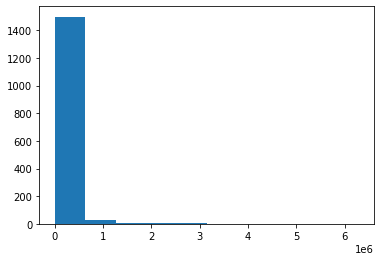

In [25]:
plt.hist(df_normal['likeCount'])

(array([1059.,  140.,   54.,   38.,   25.,   16.,   16.,   19.,   12.,
           6.]),
 array([    0. ,  9880.9, 19761.8, 29642.7, 39523.6, 49404.5, 59285.4,
        69166.3, 79047.2, 88928.1, 98809. ]),
 <BarContainer object of 10 artists>)

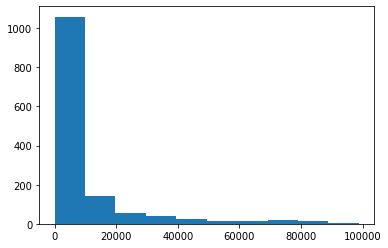

In [26]:
plt.hist(df_normal[df_normal['likeCount']<1e5]['likeCount'])

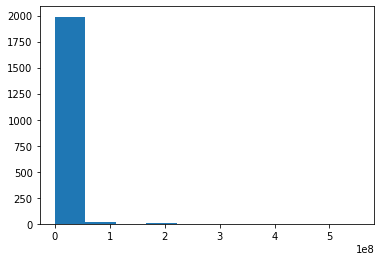

In [27]:
plt.hist(df_normal['viewCount']);

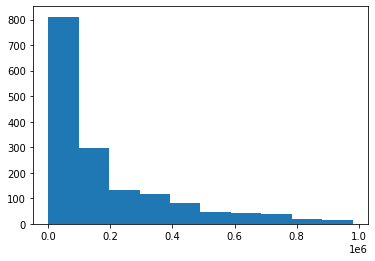

In [28]:
plt.hist(df_normal[df_normal['viewCount']<1e6]['viewCount']);

(array([1.454e+03, 4.980e+02, 3.500e+01, 7.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.800e+01]),
 array([    0.,  4366.,  8732., 13098., 17464., 21830., 26196., 30562.,
        34928., 39294., 43660.]),
 <BarContainer object of 10 artists>)

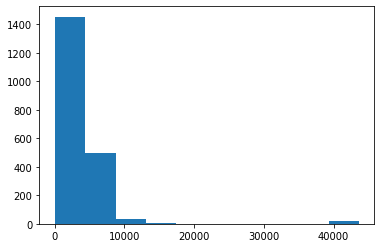

In [29]:
plt.hist(df_normal_preprocessed['durationInt'])

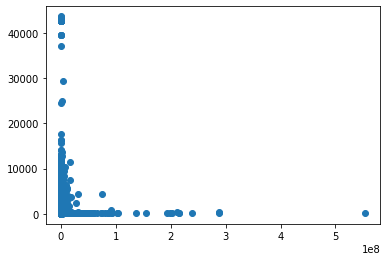

In [30]:
plt.scatter(df_normal_preprocessed['viewCount'], df_normal_preprocessed['durationInt'])

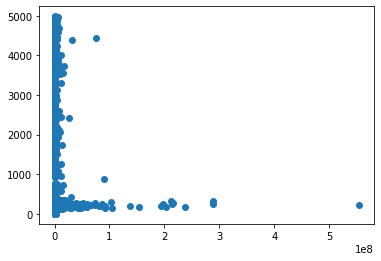

In [31]:
plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['durationInt'])

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/1613510240.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])


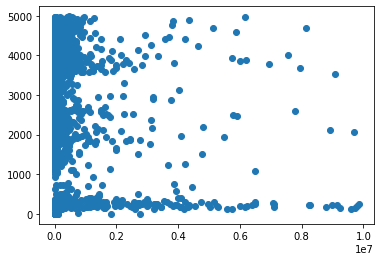

In [32]:

plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])

##### The relationship between attributes

In [33]:
corr = df_normal_preprocessed.corr()
print(df_normal_preprocessed.head(5))

            id             publishAt  \
0  _7UyRLB1HVg  2022-06-27T09:33:26Z   
1  CRW2YqJs-J4  2022-06-29T01:00:01Z   
3  8-933tJOtSY  2022-06-28T22:59:50Z   
4  yJFTFdgH5Bc  2022-05-22T03:00:18Z   
5  5BQKXF56e8A  2022-04-11T12:00:03Z   

                                               title  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1  NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...   
3  EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...   
4  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...   
5  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...   

                                         description        channelTitle  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1  NH·∫†C TR·∫∫ REMIX 2022 HAY NH·∫§T HI·ªÜN NAY - EDM Ti...         Orinn Remix   
3  EDM TikTok Hay 2022 ‚ô´ BXH Nh·∫°c Tr·∫ª Remix Hay N...            Min Xinh   
4  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªá

In [34]:
df_normal_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 3071
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2017 non-null   object 
 1   publishAt             2017 non-null   object 
 2   title                 2017 non-null   object 
 3   description           2017 non-null   object 
 4   channelTitle          2017 non-null   object 
 5   tags                  2017 non-null   object 
 6   categoryId            2017 non-null   int64  
 7   defaultAudioLanguage  2017 non-null   object 
 8   duration              2017 non-null   object 
 9   dimension             2017 non-null   object 
 10  definition            2017 non-null   int64  
 11  caption               2017 non-null   int64  
 12  privacyStatus         2017 non-null   int64  
 13  embeddable            2017 non-null   int64  
 14  madeForKids           2017 non-null   int64  
 15  viewCount            

<AxesSubplot:>

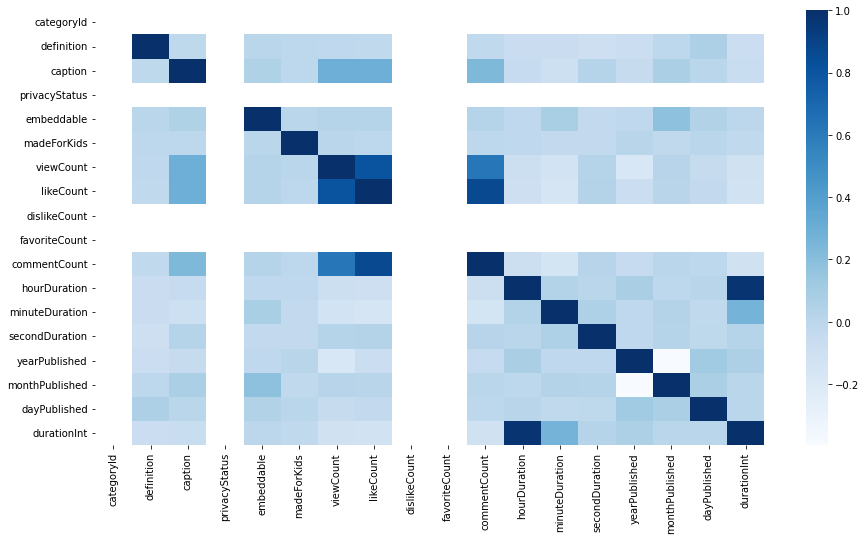

In [35]:
plt.figure(figsize=(15,8))
heatmap_df_normal_preprocess = df_normal_preprocessed[['viewCount','likeCount','dislikeCount','commentCount', 'favoriteCount']]
corr = df_normal_preprocessed.corr()
sns.heatmap(corr, cmap='Blues')

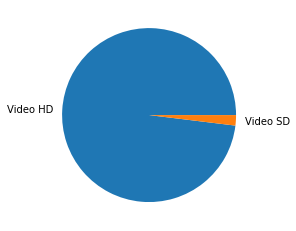

In [36]:
# plt.figure(figsize=(8,16))

# plt.scatter(df_normal_preprocessed['definition'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

hd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
sd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([hd_videos.shape[0], sd_videos.shape[0]])
mylabel = ['Video HD', 'Video SD']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

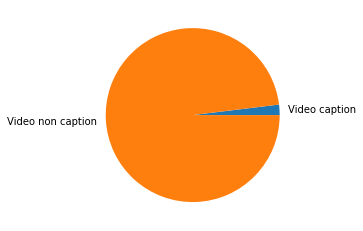

In [37]:
# plt.scatter(df_normal_preprocessed['caption'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Caption')
# plt.xlabel('Caption')
# plt.ylabel('View count')

df_normal['caption'].unique()

caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([caption_videos.shape[0], non_caption_videos.shape[0]])
mylabel = ['Video caption', 'Video non caption']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

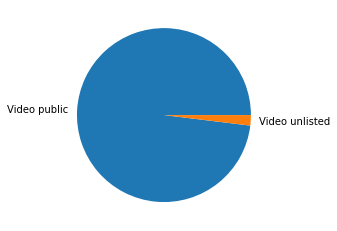

In [38]:
# plt.scatter(df_normal_preprocessed['privacyStatus'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

df_normal['privacyStatus'].unique()

public_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
unlisted_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([public_videos.shape[0], unlisted_videos.shape[0]])
mylabel = ['Video public', 'Video unlisted']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

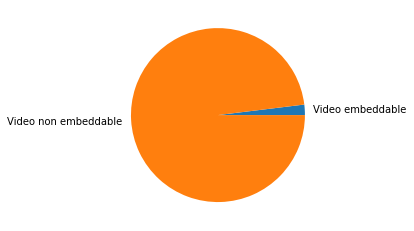

In [39]:
# plt.scatter(df_normal_preprocessed['embeddable'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['embeddable'].unique()

embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([embeddable_videos.shape[0], non_embeddable_videos.shape[0]])
mylabel = ['Video embeddable', 'Video non embeddable']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

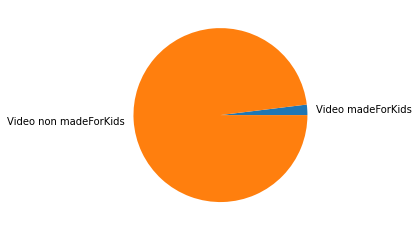

In [40]:
# plt.scatter(df_normal_preprocessed['madeForKids'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['madeForKids'].unique()
# test = df_normal[df_normal['madeForKids']==False]
madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([madeForKids_videos.shape[0], non_madeForKids_videos.shape[0]])
mylabel = ['Video madeForKids', 'Video non madeForKids']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

#### Convert text to vector IF TDF

In [41]:
def convertIfTdf(df, column, stopwords):
    data_train = df[column]
    data_train = removeStopword(data_train, stopwords)

    module_count_vector = TfidfVectorizer(stop_words=stopwords)
    model_rf_preprocess = Pipeline([('vect', module_count_vector),
                        ('tfidf', TfidfTransformer()),
                        ])
    # H√†m th·ª±c hi·ªán chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu text th√†nh d·ªØ li·ªáu s·ªë d·∫°ng ma tr·∫≠n 
    # Input: D·ªØ li·ªáu 2 chi·ªÅu d·∫°ng numpy.array, m·∫£ng nh√£n id d·∫°ng numpy.array 
    data_preprocessed = module_count_vector.fit_transform(data_train)

    print(f"\nNumber of words in the dictionary: {len(module_count_vector.vocabulary_)}")
    print(f"Data size after processing: {data_preprocessed.shape}")
    print(f"View the words in the dictionary: {module_count_vector.vocabulary_}")
    print(type(data_preprocessed))
    return data_preprocessed


In [42]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nh·∫°c', '√¢m', 'h√°t', 'tuy·ªÉn', 't·∫≠p', 'b√†i', 'nh·ªØng', 'ca', ' x ', 'ft','feat']
X = convertIfTdf(df_normal_preprocessed,'title', stopwords)
print(type(X))


Number of words in the dictionary: 2538
Data size after processing: (2017, 2538)
View the words in the dictionary: {'tr·∫ª': 2154, 'm·ªõi': 1383, 'hay': 855, 'nh·∫•t': 1469, '2022': 53, 'li√™n': 1158, 'kh√∫c': 1055, 'hi·ªán': 883, 'nay': 1406, 'ch·ªçn': 433, '129': 34, 'remix': 1726, 'edm': 655, 'tiktok': 2075, 'orinn': 1550, 'lk': 1161, 'bxh': 356, 'top': 2105, '15': 37, 'b·∫£n': 367, '40': 77, 'h√†ng': 912, 'tri·ªáu': 2132, 'view': 2256, 'b·∫£ng': 368, 'x·∫øp': 2374, 'h·∫°ng': 927, 'hits': 881, 'say': 1802, 'th√¨': 2052, 'c·ª©': 521, 'y√™u': 2399, 'b·ªè': 375, 'ƒëi': 2423, 'th·∫•t': 2060, 't√¨nh': 2181, 'c·∫•m': 514, 'nghe': 1424, 'v·ªÅ': 2295, 'ƒë√™m': 2443, '20': 46, 'm·ªôt': 1382, 'ng√†n': 1438, 'n·ªói': 1523, 'ƒëau': 2422, 'vƒÉn': 2287, 'mai': 1237, 'h∆∞∆°ng': 925, 'hot': 895, 'g√¢y': 823, 'nghi·ªán': 1428, 'nonstop': 1495, 'vinahouse': 2262, 'vi·ªát': 2269, 'mix': 1312, 'dj': 586, 'bass': 255, 'c·ª±c': 524, 'm·∫°nh': 1373, 'ƒë·∫ø': 2465, 'v∆∞∆°ng': 2289, 'ai': 147, 'chung': 414

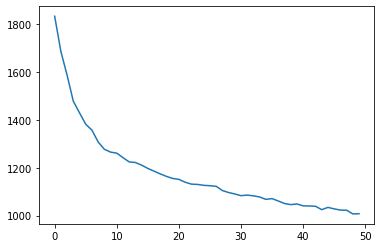

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
loss = []
for i in range(50):
    i = i + 1
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    loss.append(kmeans.inertia_)
plt.plot(range(50), loss)

In [44]:
clustering = KMeans(n_clusters=10,init='k-means++', random_state=0).fit(X)
clustering.cluster_centers_

array([[0.00195409, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00042064, 0.00032119, ..., 0.0004189 , 0.0004189 ,
        0.0004189 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [45]:
label = clustering.labels_
print(label.shape)
for i in label:
    print(i)

(2017,)
7
4
4
8
8
4
8
8
8
8
8
8
8
8
8
2
5
8
8
8
3
7
7
7
8
8
4
8
8
8
8
8
8
7
8
4
4
4
8
4
7
8
7
8
7
4
7
7
7
7
7
4
7
8
7
7
7
7
8
4
4
4
7
7
4
7
7
4
8
4
4
7
4
7
8
7
8
4
4
7
7
4
4
4
7
7
8
4
7
7
4
7
7
4
4
7
4
4
4
7
8
4
7
7
7
7
4
4
4
7
8
7
7
7
8
4
7
7
4
4
8
4
7
7
4
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
0
0
0
0
0
0
0
0
0
0
0
0
6
8
0
6
2
6
6
6
6
2
8
2
8
8
8
8
6
8
8
6
6
2
6
8
9
9
8
8
8
8
2
6
6
6
6
8
6
6
8
6
6
8
6
6
6
6
8
6
6
8
6
6
8
6
2
2
8
6
8
9
8
2
6
2
6
6
6
6
6
6
6
6
6
2
6
8
6
6
6
6
6
9
2
2
6
2
6


In [46]:
temp_df = df_normal_preprocessed.assign(label=label)
temp_df = temp_df.assign(topics = listTopics)
temp_df.info()

for i in range(len(np.unique(label))):
    print(i)
    filter_df = temp_df[label==i]
    filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 3071
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2017 non-null   object 
 1   publishAt             2017 non-null   object 
 2   title                 2017 non-null   object 
 3   description           2017 non-null   object 
 4   channelTitle          2017 non-null   object 
 5   tags                  2017 non-null   object 
 6   categoryId            2017 non-null   int64  
 7   defaultAudioLanguage  2017 non-null   object 
 8   duration              2017 non-null   object 
 9   dimension             2017 non-null   object 
 10  definition            2017 non-null   int64  
 11  caption               2017 non-null   int64  
 12  privacyStatus         2017 non-null   int64  
 13  embeddable            2017 non-null   int64  
 14  madeForKids           2017 non-null   int64  
 15  viewCount            

In [47]:
def drawWordCloud(df, column, stopwords):
  for i in range(len(np.unique(label))):
      
      #Extract cleaned text column
      data=df[df['label']==i][column].values
      data = removeStopword(data, stopwords)
      list_of_words=[];
      for sent in data:
        if type(sent)!=str:
          continue
        for word in sent.split():
          list_of_words.append(word)  
      final_text=" ".join(list_of_words)
      wordcloud = WordCloud(collocations=False).generate(final_text)
      plt.figure()
      title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
      plt.title(title)
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.axis("off")
      plt.show()



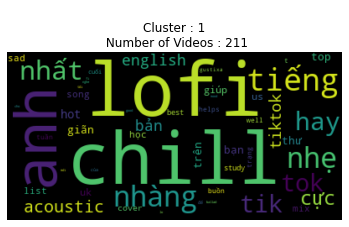

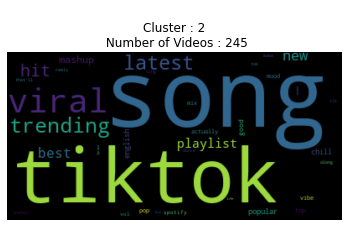

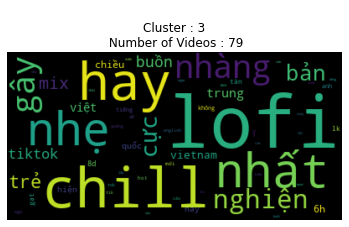

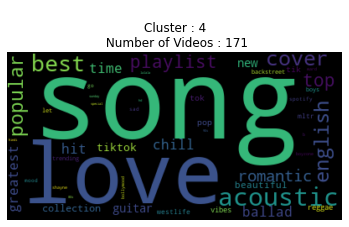

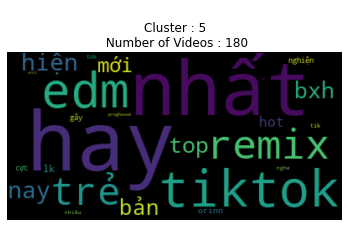

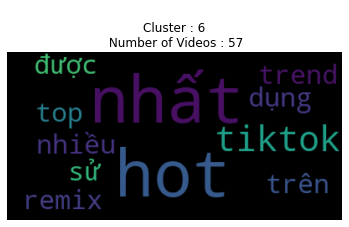

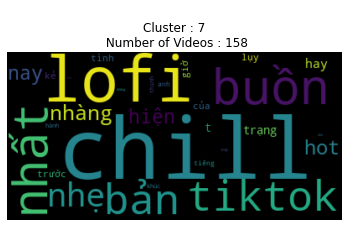

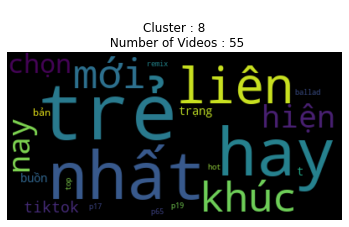

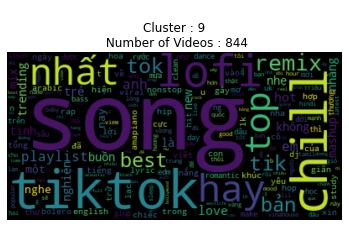

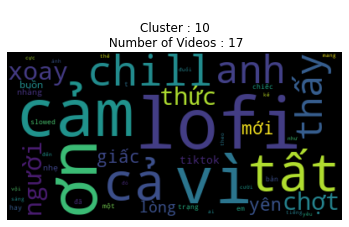

In [48]:
drawWordCloud(temp_df,'title', stopwords)

0


/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


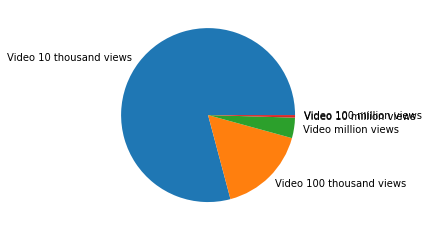

1


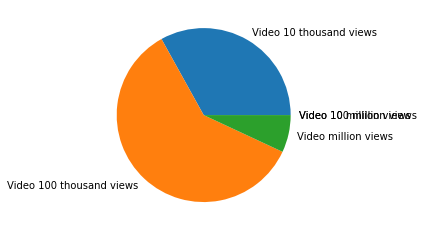

2


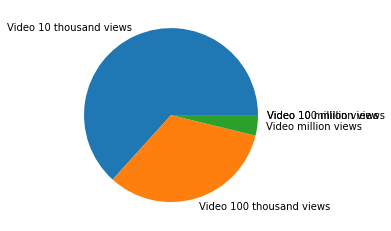

3


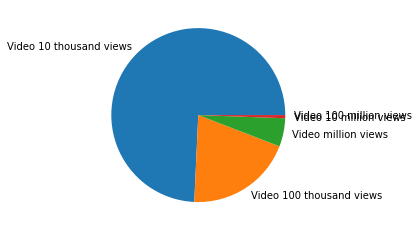

4


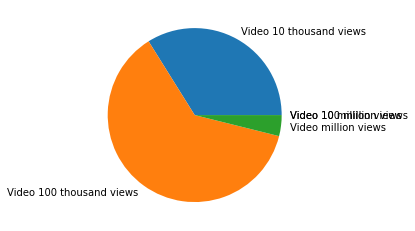

5


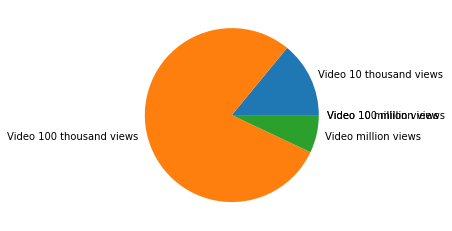

6


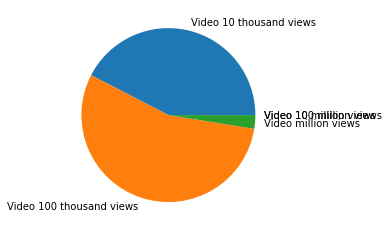

7


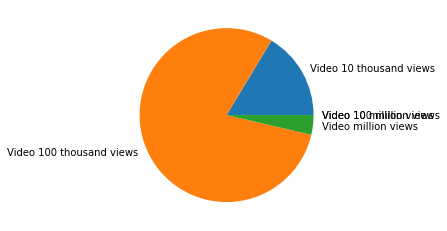

8


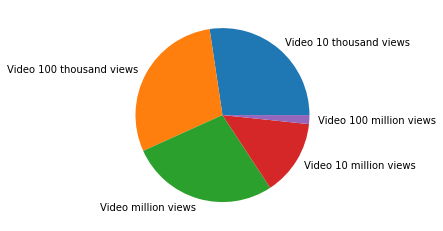

9


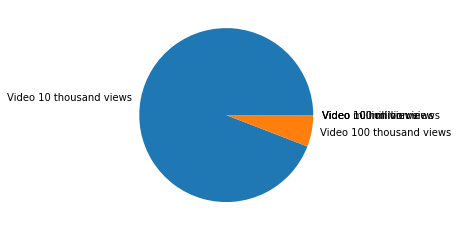

In [49]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(temp_df[temp_df['label']==i])

In [50]:
clustered_df = temp_df.groupby(['label']).sum()

In [51]:
clustered_df[['viewCount', 'likeCount', 'durationInt']]

viewCount    likeCount  durationInt
label                                      
0        50359953     713314.0       643575
1        95453887    1068172.0      1232627
2        13218511     124409.0       273591
3        51683413     336864.0      1122282
4        54994607    1300075.0       840056
5        29884662     442186.0       252214
6        24247314     482415.0       617898
7        16560254      21499.0       314865
8      7476312671  120730771.0      2022791
9          998066      37519.0        59922

In [60]:
abnormal_cluster = temp_df[temp_df['label']==8]
# abnormal_cluster = abnormal_cluster[abnormal_cluster['label']==2]

In [61]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nh·∫°c', '√¢m', 'h√°t', 'tuy·ªÉn', 't·∫≠p', 'b√†i', 'nh·ªØng', 'ca', ' x ', 'ft','feat','chill', 'anh','hay']
X_abnormal = convertIfTdf(abnormal_cluster,'title', stopwords)
print(type(X_abnormal))
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0).fit(X_abnormal)
kmeans.cluster_centers_

label = kmeans.labels_

print(label.shape)
for i in label:
    print(i)
abnormal_cluster = abnormal_cluster.assign(label = label)


Number of words in the dictionary: 2401
Data size after processing: (844, 2401)
View the words in the dictionary: {'top': 1978, '40': 44, 'tr·∫ª': 2025, 'h√†ng': 829, 'tri·ªáu': 2004, 'view': 2127, 'hay': 779, 'nh·∫•t': 1371, 'b·∫£ng': 310, 'x·∫øp': 2240, 'h·∫°ng': 843, '2022': 26, 'hits': 800, 'say': 1688, 'th√¨': 1927, 'c·ª©': 456, 'y√™u': 2264, 'b·ªè': 317, 'ƒëi': 2287, 'li√™n': 1069, 'kh√∫c': 970, 'th·∫•t': 1935, 't√¨nh': 2052, 'hi·ªán': 802, 'nay': 1309, 'c·∫•m': 449, 'nghe': 1327, 'v·ªÅ': 2166, 'ƒë√™m': 2307, 'm·ªôt': 1285, 'ng√†n': 1341, 'n·ªói': 1425, 'ƒëau': 2286, 'orinn': 1451, 'remix': 1615, 'vƒÉn': 2158, 'mai': 1144, 'h∆∞∆°ng': 841, 'hot': 813, 'tiktok': 1948, 'g√¢y': 748, 'nghi·ªán': 1331, 'nonstop': 1397, 'vinahouse': 2133, 'vi·ªát': 2140, 'mix': 1217, 'dj': 520, 'bass': 200, 'c·ª±c': 459, 'm·∫°nh': 1277, '20': 20, 'ƒë·∫ø': 2328, 'v∆∞∆°ng': 2160, 'ai': 95, 'chung': 354, 'ƒë∆∞·ª£c': 2320, 'm√£i': 1264, 'ch·ªçn': 373, '2021': 25, '29': 35, 'kh√¥ng': 969, 'tr·ªçn': 2027, 'v

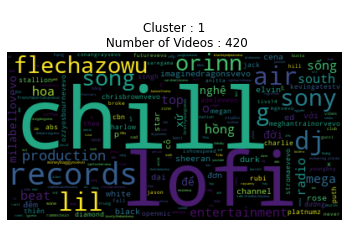

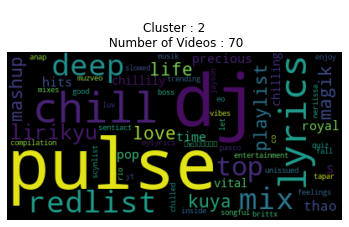

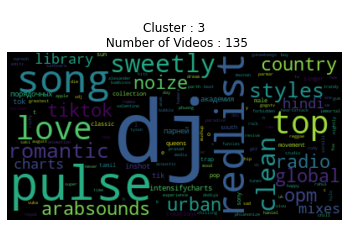

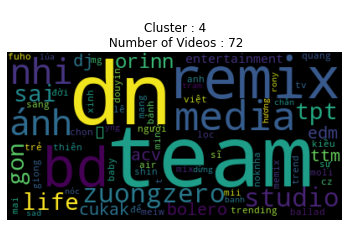

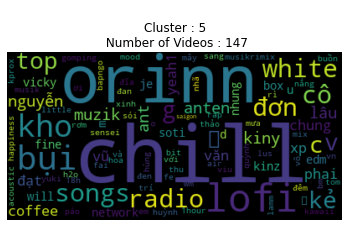

In [62]:
for i in range(len(np.unique(label))):
    
    #Extract cleaned text column
    data=abnormal_cluster[abnormal_cluster['label']==i]['channelTitle'].values
    data = removeStopword(data, stopwords)
    list_of_words=[];
    for sent in data:
      if type(sent)!=str:
        continue
      for word in sent.split():
        list_of_words.append(word)  
    final_text=" ".join(list_of_words)
    wordcloud = WordCloud(collocations=False).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


0


/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_28145/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


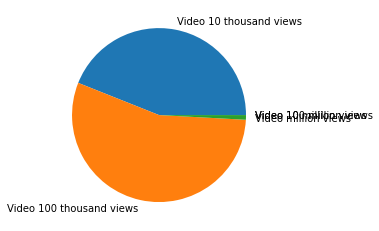

1


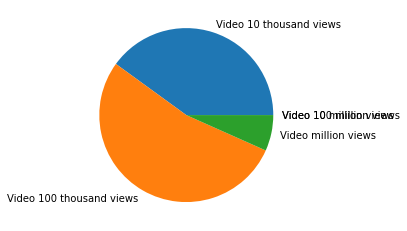

2


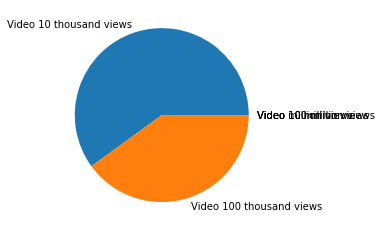

3


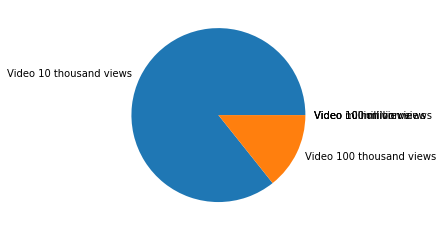

4


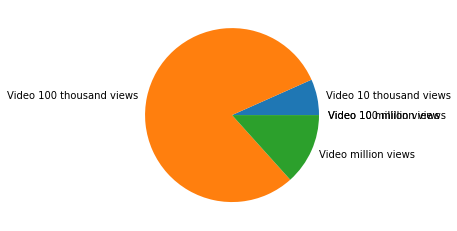

In [55]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(abnormal_cluster[abnormal_cluster['label']==i])

In [56]:
clustered_02_abnormal = abnormal_cluster[abnormal_cluster['label']!=2].sum()
clustered_02_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      23554063
likeCount      482415.0
durationInt      592901
dtype: object

In [57]:
clustered_01_abnormal = abnormal_cluster[abnormal_cluster['label']==2].sum()
clustered_01_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      693251
likeCount         0.0
durationInt     24997
dtype: object

In [58]:
for item in abnormal_cluster[abnormal_cluster['label']==0]['title']:
    print(item)

Nh·∫°c Chill TikTok - Nh·ªØng B·∫£n Nh·∫°c Lofi Chill Nh·∫π Nh√†ng - Nh·∫°c Lofi Bu·ªìn Hot Nh·∫•t Hi·ªán Nay
Nh·∫°c Chill TikTok - Nh·ªØng B·∫£n Nh·∫°c Lofi Chill Nh·∫π Nh√†ng - Nh·∫°c Lofi Bu·ªìn Hot Nh·∫•t Hi·ªán Nay
Nh·∫°c Chill TikTok - Nh·∫°c Lofi Bu·ªìn Hot Nh·∫•t Hi·ªán Nay - Nh·ªØng B·∫£n Nh·∫°c Lofi Chill Nh·∫π Nh√†ng
Nh·∫°c Chill TikTok - Nh·ªØng B·∫£n Nh·∫°c Lofi Chill Nh·∫π Nh√†ng - Nh·∫°c Lofi Bu·ªìn Hot Nh·∫•t Hi·ªán Nay
Nh·∫°c Chill TikTok - Nh·ªØng B·∫£n Nh·∫°c Lofi Chill Nh·∫π Nh√†ng - Nh·∫°c Lofi Bu·ªìn Hot Nh·∫•t Hi·ªán Nay
Nh·∫°c Chill TikTok - Nh·∫°c Lofi Bu·ªìn Hot Nh·∫•t Hi·ªán Nay - Nh·ªØng B·∫£n Nh·∫°c Lofi Chill Nh·∫π Nh√†ng
Nh·∫°c Chill TikTok - Nh·ªØng B·∫£n Nh·∫°c Lofi Chill Nh·∫π Nh√†ng - Nh·∫°c Lofi Bu·ªìn Hot Nh·∫•t Hi·ªán Nay
Nh·∫°c Chill TikTok - Nh·ªØng B·∫£n Nh·∫°c Lofi Chill Nh·∫π Nh√†ng - Nh·∫°c Lofi Bu·ªìn Hot Nh·∫•t Hi·ªán Nay
Nh·∫°c Chill TikTok - Nh·ªØng B·∫£n Nh·∫°c Lofi Chill Nh·∫π Nh√†ng - Nh·∫°c Lofi Bu·ªìn Hot Nh·∫•t Hi·ªán Nay
Nh·∫°c Chi

In [59]:
print(wordcloud.words_)

{'ƒëƒ©a': 1.0, 'chill': 1.0, 'p√°o': 0.07142857142857142, 'xinh': 0.07142857142857142}
